In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/ML/Bank_default/train_data_0.pq')
df

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,...,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,...,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,...,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,...,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,...,3,3,3,4,1,3,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974719,249998,4,1,9,14,8,10,11,8,4,...,3,3,3,4,1,2,3,1,0,1
1974720,249998,5,7,9,4,8,1,11,19,1,...,3,3,3,4,1,2,4,1,1,1
1974721,249999,1,9,0,10,8,10,11,16,2,...,3,3,3,4,1,2,3,1,0,1
1974722,249999,2,9,16,10,13,10,4,12,2,...,3,3,3,4,1,2,3,1,0,0


In [ ]:
df.shape

(1974724, 61)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974724 entries, 0 to 1974723
Data columns (total 61 columns):
 #   Column                         Dtype
---  ------                         -----
 0   id                             int64
 1   rn                             int64
 2   pre_since_opened               int64
 3   pre_since_confirmed            int64
 4   pre_pterm                      int64
 5   pre_fterm                      int64
 6   pre_till_pclose                int64
 7   pre_till_fclose                int64
 8   pre_loans_credit_limit         int64
 9   pre_loans_next_pay_summ        int64
 10  pre_loans_outstanding          int64
 11  pre_loans_total_overdue        int64
 12  pre_loans_max_overdue_sum      int64
 13  pre_loans_credit_cost_rate     int64
 14  pre_loans5                     int64
 15  pre_loans530                   int64
 16  pre_loans3060                  int64
 17  pre_loans6090                  int64
 18  pre_loans90                    int64
 19  

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/ML/target.csv')
df2

,id,flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2999995,2999995,0
2999996,2999996,0
2999997,2999997,0
2999998,2999998,0


In [ ]:
column_names = df.columns.tolist()
print(column_names)

['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm', 'pre_fterm', 'pre_till_pclose', 'pre_till_fclose', 'pre_loans_credit_limit', 'pre_loans_next_pay_summ', 'pre_loans_outstanding', 'pre_loans_total_overdue', 'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5', 'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90', 'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit', 'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit', 'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2', 'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12', 'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16', 'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20', 'enc_paym_21', 'enc_paym_22', 'enc_paym_23', 'enc_paym_24', 'enc_loans_account_holder_type', 'enc_loans_credit_status',

In [ ]:
columns_to_remove = ['rn','pre_since_confirmed', 'pre_pterm', 'pre_fterm', 'pre_till_pclose', 'pre_till_fclose' , 'enc_loans_account_holder_type', 'enc_loans_credit_status', 'enc_loans_credit_type', 'enc_loans_account_cur', 'pclose_flag', 'fclose_flag']
df = df.drop(columns=columns_to_remove)

In [ ]:
# columns_to_remove = ['rn','pre_since_confirmed', 'pre_pterm', 'pre_fterm', 'pre_till_pclose', 'pre_till_fclose', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2', 'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12', 'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16', 'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20', 'enc_paym_21', 'enc_paym_22', 'enc_paym_23', 'enc_paym_24', 'enc_loans_account_holder_type', 'enc_loans_credit_status', 'enc_loans_credit_type', 'enc_loans_account_cur', 'pclose_flag', 'fclose_flag']
# df = df.drop(columns=columns_to_remove)

In [ ]:
df.head(20)

,id,pre_since_opened,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,...,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24
0,0,18,11,3,3,0,2,11,6,16,...,3,3,3,3,3,4,3,3,3,4
1,0,18,0,3,3,0,2,11,6,16,...,0,0,0,0,0,1,0,0,0,4
2,0,18,11,0,5,0,2,8,6,16,...,0,0,0,0,0,1,0,0,0,4
3,0,4,12,2,3,0,2,4,6,16,...,3,3,3,3,3,4,3,3,3,4
4,0,5,10,2,3,0,2,4,6,16,...,3,3,3,3,3,4,3,3,3,4
5,0,5,4,2,3,0,2,4,6,16,...,0,0,0,0,3,4,3,3,3,4
6,0,3,15,5,3,0,2,3,6,16,...,3,3,3,3,3,4,3,3,3,4
7,0,2,15,5,3,0,2,13,6,16,...,3,3,3,3,3,4,3,3,3,4
8,0,1,2,5,1,0,2,11,6,16,...,3,3,3,3,3,4,3,3,3,4
9,0,7,16,4,2,0,2,11,6,16,...,3,3,3,3,3,4,3,3,3,4


In [ ]:
df['id'].value_counts()

,count
id,
62963,51
77107,46
72660,44
4951,43
185462,43
...,...
220126,1
97643,1
220124,1


In [ ]:
df['id'].nunique()

250000

In [ ]:
filtered_df = df[(df['id'] >= 0) & (df['id'] <= 2)]
filtered_df

,id,pre_since_opened,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,...,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24
0,0,18,11,3,3,0,2,11,6,16,...,3,3,3,3,3,4,3,3,3,4
1,0,18,0,3,3,0,2,11,6,16,...,0,0,0,0,0,1,0,0,0,4
2,0,18,11,0,5,0,2,8,6,16,...,0,0,0,0,0,1,0,0,0,4
3,0,4,12,2,3,0,2,4,6,16,...,3,3,3,3,3,4,3,3,3,4
4,0,5,10,2,3,0,2,4,6,16,...,3,3,3,3,3,4,3,3,3,4
5,0,5,4,2,3,0,2,4,6,16,...,0,0,0,0,3,4,3,3,3,4
6,0,3,15,5,3,0,2,3,6,16,...,3,3,3,3,3,4,3,3,3,4
7,0,2,15,5,3,0,2,13,6,16,...,3,3,3,3,3,4,3,3,3,4
8,0,1,2,5,1,0,2,11,6,16,...,3,3,3,3,3,4,3,3,3,4
9,0,7,16,4,2,0,2,11,6,16,...,3,3,3,3,3,4,3,3,3,4


In [ ]:
columns_to_remove = ['pre_since_opened']
filtered_df = filtered_df.drop(columns=columns_to_remove)

In [ ]:
filtered_df

,id,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,...,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24
0,0,11,3,3,0,2,11,6,16,5,...,3,3,3,3,3,4,3,3,3,4
1,0,0,3,3,0,2,11,6,16,5,...,0,0,0,0,0,1,0,0,0,4
2,0,11,0,5,0,2,8,6,16,5,...,0,0,0,0,0,1,0,0,0,4
3,0,12,2,3,0,2,4,6,16,5,...,3,3,3,3,3,4,3,3,3,4
4,0,10,2,3,0,2,4,6,16,5,...,3,3,3,3,3,4,3,3,3,4
5,0,4,2,3,0,2,4,6,16,5,...,0,0,0,0,3,4,3,3,3,4
6,0,15,5,3,0,2,3,6,16,5,...,3,3,3,3,3,4,3,3,3,4
7,0,15,5,3,0,2,13,6,16,5,...,3,3,3,3,3,4,3,3,3,4
8,0,2,5,1,0,2,11,6,16,5,...,3,3,3,3,3,4,3,3,3,4
9,0,16,4,2,0,2,11,6,16,5,...,3,3,3,3,3,4,3,3,3,4


In [ ]:
num_columns = len(filtered_df.columns)
num_columns

48

In [ ]:
for column in filtered_df.columns:
    #print("Column:", column)
    print(filtered_df[column])
    print(filtered_df[['id', column]])
    print()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    2
25    2
26    2
Name: id, dtype: int64
    id  id
0    0   0
1    0   0
2    0   0
3    0   0
4    0   0
5    0   0
6    0   0
7    0   0
8    0   0
9    0   0
10   1   1
11   1   1
12   1   1
13   1   1
14   1   1
15   1   1
16   1   1
17   1   1
18   1   1
19   1   1
20   1   1
21   1   1
22   1   1
23   1   1
24   2   2
25   2   2
26   2   2

0     11
1      0
2     11
3     12
4     10
5      4
6     15
7     15
8      2
9     16
10     1
11     6
12     6
13     6
14     3
15     0
16     6
17    14
18    10
19    16
20    15
21    19
22     1
23    11
24     1
25     3
26     1
Name: pre_loans_credit_limit, dtype: int64
    id  pre_loans_credit_limit
0    0                      11
1    0                       0
2    0                      11
3    0                      12
4    0     

In [ ]:
column_names2 = filtered_df.columns.tolist()
print(column_names2)

['id', 'pre_loans_credit_limit', 'pre_loans_next_pay_summ', 'pre_loans_outstanding', 'pre_loans_total_overdue', 'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5', 'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90', 'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit', 'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit', 'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2', 'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12', 'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16', 'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20', 'enc_paym_21', 'enc_paym_22', 'enc_paym_23', 'enc_paym_24']


In [ ]:
# import pandas as pd

# # Create the dataframe
# df = pd.DataFrame({
#     'id': [0, 0, 0, 1, 1, 1, 2, 2, 2],
#     'pre_loans_credit_limit': [11, 0, 11, 1, 6, 6, 1, 3, 1],
#     'pre_loans_next_pay_summ': [3, 3, 0, 2, 2, 2, 1, 2, 1],
#     'pre_loans_outstanding': [3, 3, 5, 4, 3, 3, 2, 3, 3],
#     'pre_loans5': [6, 6, 6, 6, 6, 6, 6, 6, 6],
#     'pre_util': [16, 16, 15, 2, 0, 16, 6, 16, 3],
#     'is_zero_loans5': [1, 1, 1, 1, 1, 1, 1, 1, 1],
#     'is_zero_util': [1, 1, 0, 0, 0, 1, 0, 1, 0]
# })

# # Define aggregation functions
# aggregations = {
#     'pre_loans_credit_limit': 'mean',
#     'pre_loans_next_pay_summ': 'mean',
#     'pre_loans_outstanding': 'mean',
#     'pre_loans5': lambda x: x.value_counts().index[0],
#     'pre_util': 'mean',
#     'is_zero_loans5': lambda x: x.mode().iloc[0],
#     'is_zero_util': lambda x: x.mode().iloc[0]
# }

# # Apply aggregations based on 'id'
# result = df.groupby('id').agg(aggregations)
# print(result)

In [ ]:
grouped = filtered_df.groupby('id').size()

# Create a new column 'count' in 'filtered_df' and assign the counts based on 'id'
filtered_df['Number_of_loans'] = filtered_df['id'].map(grouped)

In [ ]:
filtered_df.head(5)

,id,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,...,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,Number_of_loans
0,0,11,3,3,0,2,11,6,16,5,...,3,3,3,3,4,3,3,3,4,10
1,0,0,3,3,0,2,11,6,16,5,...,0,0,0,0,1,0,0,0,4,10
2,0,11,0,5,0,2,8,6,16,5,...,0,0,0,0,1,0,0,0,4,10
3,0,12,2,3,0,2,4,6,16,5,...,3,3,3,3,4,3,3,3,4,10
4,0,10,2,3,0,2,4,6,16,5,...,3,3,3,3,4,3,3,3,4,10


In [ ]:
columns_to_count = ['enc_paym_0', 'enc_paym_1', 'enc_paym_2', 'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12', 'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16', 'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20', 'enc_paym_21', 'enc_paym_22', 'enc_paym_23', 'enc_paym_24']
filtered_df['Count_0'] = filtered_df[columns_to_count].apply(lambda row: row.value_counts().get(0, 0), axis=1)
filtered_df['Count_1'] = filtered_df[columns_to_count].apply(lambda row: row.value_counts().get(1, 0), axis=1)
filtered_df['Count_2'] = filtered_df[columns_to_count].apply(lambda row: row.value_counts().get(2, 0), axis=1)
filtered_df['Count_3'] = filtered_df[columns_to_count].apply(lambda row: row.value_counts().get(3, 0), axis=1)
filtered_df['Count_4'] = filtered_df[columns_to_count].apply(lambda row: row.value_counts().get(4, 0), axis=1)

filtered_df.head(5)


,id,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,...,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,Number_of_loans,Count_0,Count_1,Count_2,Count_3,Count_4
0,0,11,3,3,0,2,11,6,16,5,...,3,3,3,4,10,2,0,0,20,3
1,0,0,3,3,0,2,11,6,16,5,...,0,0,0,4,10,22,2,0,0,1
2,0,11,0,5,0,2,8,6,16,5,...,0,0,0,4,10,22,2,0,0,1
3,0,12,2,3,0,2,4,6,16,5,...,3,3,3,4,10,10,2,0,11,2
4,0,10,2,3,0,2,4,6,16,5,...,3,3,3,4,10,7,0,0,15,3


In [ ]:
num_columns = len(df.columns)
num_columns

49

In [ ]:
import pandas as pd

columns_to_count = ['enc_paym_0', 'enc_paym_1', 'enc_paym_2', 'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12', 'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16', 'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20', 'enc_paym_21', 'enc_paym_22', 'enc_paym_23', 'enc_paym_24']


df['Count_0'] = df[columns_to_count].apply(lambda row: row.value_counts().get(0, 0), axis=1)
df['Count_1'] = df[columns_to_count].apply(lambda row: row.value_counts().get(1, 0), axis=1)
df['Count_2'] = df[columns_to_count].apply(lambda row: row.value_counts().get(2, 0), axis=1)
df['Count_3'] = df[columns_to_count].apply(lambda row: row.value_counts().get(3, 0), axis=1)
df['Count_4'] = df[columns_to_count].apply(lambda row: row.value_counts().get(4, 0), axis=1)

df


,id,pre_since_opened,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,...,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,Count_0,Count_1,Count_2,Count_3,Count_4
0,0,18,11,3,3,0,2,11,6,16,...,4,3,3,3,4,2,0,0,20,3
1,0,18,0,3,3,0,2,11,6,16,...,1,0,0,0,4,22,2,0,0,1
2,0,18,11,0,5,0,2,8,6,16,...,1,0,0,0,4,22,2,0,0,1
3,0,4,12,2,3,0,2,4,6,16,...,4,3,3,3,4,10,2,0,11,2
4,0,5,10,2,3,0,2,4,6,16,...,4,3,3,3,4,7,0,0,15,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974719,249998,1,8,4,2,0,2,4,6,16,...,4,3,3,3,4,12,1,0,10,2
1974720,249998,7,19,1,4,0,2,7,6,16,...,4,3,3,3,4,5,0,0,17,3
1974721,249999,9,16,2,3,0,2,7,6,16,...,4,3,3,3,4,8,0,0,14,3
1974722,249999,9,12,2,3,0,2,7,6,16,...,4,3,3,3,4,9,0,0,13,3


In [ ]:
columns_to_remove = ['enc_paym_0', 'enc_paym_1', 'enc_paym_2', 'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7', 'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12', 'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16', 'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20', 'enc_paym_21', 'enc_paym_22', 'enc_paym_23', 'enc_paym_24']
df = df.drop(columns=columns_to_remove)

In [ ]:
df

,id,pre_since_opened,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,...,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,Count_0,Count_1,Count_2,Count_3,Count_4
0,0,18,11,3,3,0,2,11,6,16,...,2,17,1,1,1,2,0,0,20,3
1,0,18,0,3,3,0,2,11,6,16,...,2,17,1,1,1,22,2,0,0,1
2,0,18,11,0,5,0,2,8,6,16,...,2,17,0,1,1,22,2,0,0,1
3,0,4,12,2,3,0,2,4,6,16,...,2,17,1,1,1,10,2,0,11,2
4,0,5,10,2,3,0,2,4,6,16,...,2,17,1,1,1,7,0,0,15,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974719,249998,1,8,4,2,0,2,4,6,16,...,2,17,0,1,1,12,1,0,10,2
1974720,249998,7,19,1,4,0,2,7,6,16,...,2,17,0,1,1,5,0,0,17,3
1974721,249999,9,16,2,3,0,2,7,6,16,...,2,17,1,1,1,8,0,0,14,3
1974722,249999,9,12,2,3,0,2,7,6,16,...,2,17,1,1,1,9,0,0,13,3


In [ ]:
column_names2 = df.columns.tolist()
print(column_names2)

['id', 'pre_since_opened', 'pre_loans_credit_limit', 'pre_loans_next_pay_summ', 'pre_loans_outstanding', 'pre_loans_total_overdue', 'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5', 'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90', 'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit', 'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit', 'is_zero_maxover2limit', 'Count_0', 'Count_1', 'Count_2', 'Count_3', 'Count_4']


In [ ]:
grouped = df.groupby('id').size()

# Create a new column 'count' in 'filtered_df' and assign the counts based on 'id'
df['Number_of_loans'] = df['id'].map(grouped)

In [ ]:
column_names2 = df.columns.tolist()
print(column_names2)

['id', 'pre_since_opened', 'pre_loans_credit_limit', 'pre_loans_next_pay_summ', 'pre_loans_outstanding', 'pre_loans_total_overdue', 'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5', 'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90', 'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060', 'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit', 'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit', 'is_zero_maxover2limit', 'Count_0', 'Count_1', 'Count_2', 'Count_3', 'Count_4', 'Number_of_loans']


In [ ]:
#define aggregation functions
aggregations = {

    'pre_loans_credit_limit':'mean',
    'pre_loans_next_pay_summ':'mean',
    'pre_loans_outstanding':'mean',
    'pre_loans_total_overdue':'sum',
    'pre_loans_max_overdue_sum':'max',
    'pre_loans_credit_cost_rate':'mean',
    'pre_loans5':'max',
    'pre_loans530':'max',
    'pre_loans3060':'max',
    'pre_loans6090':'max',
    'pre_loans90':'max',
    'is_zero_loans5':lambda x: x.mode().iloc[0],
    'is_zero_loans530':lambda x: x.mode().iloc[0],
    'is_zero_loans3060':lambda x: x.mode().iloc[0],
    'is_zero_loans6090':lambda x: x.mode().iloc[0],
    'is_zero_loans90':lambda x: x.mode().iloc[0],
    'pre_util':'mean',
    'pre_over2limit':lambda x: x.mode().iloc[0],
    'pre_maxover2limit':'max',
    'is_zero_util':lambda x: x.mode().iloc[0],
    'is_zero_over2limit':lambda x: x.mode().iloc[0],
    'is_zero_maxover2limit':lambda x: x.mode().iloc[0],
    'Count_0':'sum',
    'Count_1':'sum',
    'Count_2':'sum',
    'Count_3':'sum',
    'Count_4':'sum',
    'Number_of_loans':'mean'

}

 # Apply aggregations based on 'id'
result = df.groupby('id').agg(aggregations)

print(result)

        pre_loans_credit_limit  pre_loans_next_pay_summ  \
id                                                        
0                     9.600000                 3.100000   
1                     8.142857                 2.142857   
2                     1.666667                 1.333333   
3                     9.866667                 2.600000   
4                    12.000000                 1.000000   
...                        ...                      ...   
249995                9.076923                 2.384615   
249996                9.521739                 2.000000   
249997                5.285714                 3.428571   
249998               13.400000                 2.200000   
249999               14.666667                 2.000000   

        pre_loans_outstanding  pre_loans_total_overdue  \
id                                                       
0                    2.900000                        0   
1                    2.928571                        0   


In [ ]:
df = result.merge(df2, on='id', how='inner')
df

,id,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,...,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,Count_0,Count_1,Count_2,Count_3,Count_4,Number_of_loans,flag
0,0,9.600000,3.100000,2.900000,0,2,8.000000,6,16,5,...,1,1,1,110,8,0,109,23,10.0,0
1,1,8.142857,2.142857,2.928571,0,3,3.714286,6,16,5,...,1,1,1,138,21,2,161,28,14.0,0
2,2,1.666667,1.333333,3.000000,0,2,4.000000,6,16,5,...,0,1,1,21,8,4,35,7,3.0,0
3,3,9.866667,2.600000,3.266667,0,2,4.466667,6,16,5,...,1,1,1,225,21,0,105,24,15.0,0
4,4,12.000000,1.000000,3.000000,0,2,0.000000,6,16,5,...,1,1,1,0,0,0,22,3,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249995,9.076923,2.384615,3.076923,0,3,4.615385,6,16,5,...,1,1,1,117,4,0,168,36,13.0,0
249996,249996,9.521739,2.000000,2.913043,0,3,4.347826,6,16,5,...,1,1,1,198,21,1,297,58,23.0,0
249997,249997,5.285714,3.428571,3.000000,0,2,5.714286,6,16,5,...,1,1,1,109,11,0,42,13,7.0,0
249998,249998,13.400000,2.200000,2.800000,0,2,5.200000,6,16,5,...,0,1,1,29,1,0,81,14,5.0,0


In [ ]:
count = df[df['flag'] == 1].shape[0]
print("Number of rows with flag = 1:", count)

Number of rows with flag = 1: 7734


In [ ]:
count = df[df['flag'] == 0].shape[0]
print("Number of rows with flag = 0:", count)

Number of rows with flag = 0: 242266


In [ ]:
X = df.drop('flag', axis=1)  # Replace 'target_column_name' with the actual name of target variable column
y = df['flag']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Split the data into training and testing sets (X_train, X_test, y_train, y_test)

# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Undersampling with RandomUndersampler
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# we have the resampled training data (X_train_resampled, y_train_resampled)
# Proceed with training the model using the resampled data


In [ ]:
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.65084


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Assuming you have your feature matrix 'X' and target variable 'y'
# # Initialize the SVM model
# model = SVC()

# # Train the model on the training data
# model.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = model.predict(X_test)

# # Calculate the accuracy of the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


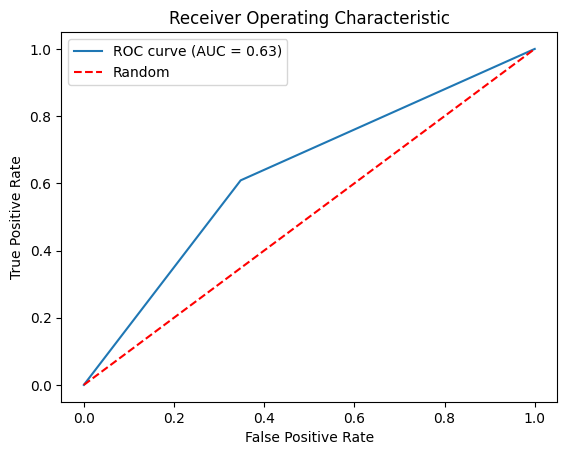

0.6305081044874314


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming you have already trained your model and obtained the predicted probabilities and true labels
y_true = y_test  # True labels (0 or 1)
y_scores = y_pred  # Predicted probabilities

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute AUC
auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()
# Print AUC value
print(auc)